In [48]:
#basic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#---------------------------------------------------------------------------------------------------------------------
#NLP imports
import nltk
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import re
import string
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
#----------------------------------------------------------------------------------------------------------------------
#Classification imports
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline,make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import plot_confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#loading the data to a DataFrame
df = pd.read_csv('Job titles and industries.csv')
df.head(5)

job title  \
0  technical support and helpdesk supervisor - county buildings, ayr soa04086   
1  senior technical support engineer                                            
2  head of it services                                                          
3  js front end engineer                                                        
4  network and telephony controller                                             

  industry  
0  IT       
1  IT       
2  IT       
3  IT       
4  IT

In [ ]:
df.describe()    #data description

job title industry
count   8586                 8586   
unique  3890                 4      
top     marketing executive  IT     
freq    91                   4746

In [ ]:
df.info()  #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


In [49]:
df.isna().sum()  #checking if there're NaNs

job title    0
industry     0
dtype: int64

In [50]:
print('The Whole length of the dataframe: ' ,len(df ))
print('Number of duplicates in dataset is : ' ,df.duplicated().sum()) 

The Whole length of the dataframe:  8586
Number of duplicates in dataset is :  4618


**Data Visualization**


In [51]:
print("the industries are : ",df['industry'].unique()) #viewing the unique values


the industries are :  ['IT' 'Marketing' 'Education' 'Accountancy']


In [52]:
df.groupby('industry').count() #grouping by col=industry

job title
industry              
Accountancy  374      
Education    1435     
IT           4746     
Marketing    2031

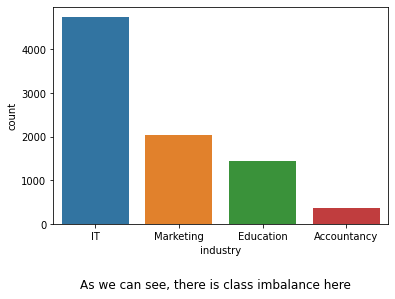

In [ ]:
sns.countplot(data=df, x='industry');
txt="As we can see, there is class imbalance here"          #show the imbalance of the data
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12);

**Data Cleaning**

In [ ]:
#for printing the whole Data rows
pd.set_option("display.max_rows", None, "display.max_columns", None,'display.max_colwidth', -1)
df['job title']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


0       technical support and helpdesk supervisor - county buildings, ayr soa04086                          
1       senior technical support engineer                                                                   
2       head of it services                                                                                 
3       js front end engineer                                                                               
4       network and telephony controller                                                                    
5       privileged access management expert                                                                 
6       devops engineers x 3 - global brand                                                                 
7       devops engineers x 3 - global brand                                                                 
8       data modeller                                                                                       
9       php web dev

[1] First : Removing the (it) word from stop word as it indicates the 'it' department in our data.

[2] second : converting all the words to lower case.

[3] 3rd : cleaning data 



In [ ]:
stopwords = nltk.corpus.stopwords.words('english')  #loading the words needed to be removed
stopwords.remove("it") # as it simulates (it department), should remove from stop words

In [57]:
df['job_title'] = df['job title'].str.lower()  
df['job_title'] = df['job_title'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))       #remove dash
df['job_title'] =  df['job_title'].str.replace('£',' ')     #£ index=6386         #removing all strings contains '£'
df['job_title'] = df['job_title'].str.replace(r'"', "")                           #replace with  quote 
df['job_title'] = df['job_title'].str.replace(r'/', " ")                           #replace any salsh with space
#df['job_title'] =  df['job_title'].str.replace('[^a-zA-Z]', ' ')
df['job_title'] =  df['job_title'].apply(lambda x: re.sub(r'\d+',' ',x))           #replace all the digits with space
df['job_title'] =  df['job_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])) #removing the stopwords



In [ ]:
def lemmatization(listofSentence):
  '''
   this function is used for lemmatizing words in dataset
   inputs : sentence, row by row in a column
   output : lemmatized sentence in each row in a column
  '''
  preprocess_list = []
  lemmatizer = WordNetLemmatizer()

  for sentence in listofSentence :   
    tokenize_sentence = nltk.tokenize.word_tokenize(sentence)
    words_lemmatize = (lemmatizer.lemmatize(w) for w in tokenize_sentence)         
    sentence_clean = ' '.join(w for w in words_lemmatize )
    preprocess_list.append(sentence_clean)
    
  return preprocess_list

In [ ]:
df['job_title_cleaned'] = lemmatization(df['job_title'])
df

job title  \
0     technical support and helpdesk supervisor - county buildings, ayr soa04086                             
1     senior technical support engineer                                                                      
2     head of it services                                                                                    
3     js front end engineer                                                                                  
4     network and telephony controller                                                                       
5     privileged access management expert                                                                    
6     devops engineers x 3 - global brand                                                                    
7     devops engineers x 3 - global brand                                                                    
8     data modeller                                                                                          
9     php web developer £45,000 based in london                                                              
10    devops engineers x 3 - global brand                                                                    
11    devops engineers x 3 - global brand                                                                    
12    solution / technical architect - ethical brand                                                         
13    lead developer - ethical brand                                                                         
14    junior front-end developer                                                                             
15    vb .net web developer, milton keynes, £45k                                                             
16    data scientist, newcastle, up to £40k                                                                  
17    senior bi engineer                                                                                     
18    machine learning engineer                                                                              
19    full stack developer, oxfordshire, £40k                                                                
20    c# software developer, waltham cross, £55k                                                             
21    senior data engineer                                                                                   
22    erp support analyst - unit4, agresso business world                                                    
23    application support analyst - cheshire - financial services                                            
24    accountancy software trainer - manchester - remote working                                             
25    business analyst                                                                                       
26    business analyst                                                                                       
27    delivery lead                                                                                          
28    devops engineer x 2 temp - county buildings, ayr soa04079                                              
29    it change and problem analyst                                                                          
30    data science - product manager                                                                         
31    development team lead                                                                                  
32    project manager                                                                                        
33    .net developer                                                                                         
34    senior web developer                                                                                   
35    java developer                                                                                         
36    .net developer       

**Modeling**

In [ ]:

X = df['job_title_cleaned'] 
y = df['industry']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
#Pre-process and Vectorize train and test data
vect = CountVectorizer(max_features=500) 
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(6439, 500) (2147, 500)


In [ ]:
models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("MultinimialNB", MultinomialNB()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("RandomForest",RandomForestClassifier()))

**Dealing with Data without Balancing**

In [ ]:
from sklearn.svm import LinearSVC
vect = CountVectorizer(max_features=1000) #Step-1
X_train_dtm = vect.fit_transform(X_train)#combined step 2 and 3
X_test_dtm = vect.transform(X_test)
classifier = LinearSVC(class_weight=None) #notice the “balanced” option
classifier.fit(X_train_dtm, y_train) #fit the model with training data
y_pred_class = classifier.predict(X_test_dtm)
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

Accuracy:  0.9417792268281323


In [ ]:
#Testing Model
job_title = "Automation Tester"
job_vectorized= vect.transform([job_title])
x = classifier.predict(job_vectorized)
x[0]

'IT'

In [ ]:
from joblib import dump
import pickle                                      #save model
dump(classifier, 'model.joblib')
pickle.dump(vect, open('Vectorizer.pkl', 'wb'))
pickle.dump(classifier, open("model.pkl", 'wb'))

In [ ]:
accuracy = []
names = []
for name,model in models:
  model.fit(X_train_dtm, y_train)
  y_pred_class = model.predict(X_test_dtm)     #try out all the model
  names.append(name)
  accuracy.append(accuracy_score(y_test, y_pred_class))

for i in range(len(names)):
    print("{} accuracy = {}".format(names[i],accuracy[i]))

LogisticRegression accuracy = 0.935724266418258
MultinimialNB accuracy = 0.9273404750815091
SVC accuracy = 0.9385188635305077
LinearSVC accuracy = 0.9417792268281323
RandomForest accuracy = 0.9315323707498836


**Dealing with the data Balanced**

[1] Dealing with the

[1]**MultinomialNB Model**

In [ ]:
all_labels= ['IT' ,'Marketing' ,'Education', 'Accountancy']

[1] Using RandomOverSampler()

In [ ]:
model = make_pipeline_imb(TfidfVectorizer(), RandomOverSampler(), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)                                                      #using pipline in order to preform tfidvectorizer -> RandomoverSampler
print("Accuracy: ", accuracy_score(y_test, y_pred))                                  #apply MultinomialNB Model
print("Confusion matrix: ", confusion_matrix(y_test, y_pred,labels=all_labels))

Accuracy:  0.9259431765253843
Confusion matrix:  [[1122   50    2   12]
 [  24  480    8   17]
 [  11   18  298    8]
 [   5    1    3   88]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[2] Using SMOTE

In [ ]:
model = make_pipeline_imb(TfidfVectorizer() , SMOTE(), MultinomialNB())
model.fit(X_train, y_train)                                                        
y_pred = model.predict(X_test)                                                   #using pipline in order to preform tfidvectorizer -> SMOTE
print("Accuracy: ", accuracy_score(y_test, y_pred))                              #apply MultinomialNB Model
print("Confusion matrix: ", confusion_matrix(y_test, y_pred,labels=all_labels))  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9189566837447601
Confusion matrix:  [[1108   47    2   29]
 [  26  478   10   15]
 [  10   19  298    8]
 [   5    1    2   89]]


[2] **SVC Model**

In [ ]:
model = make_pipeline_imb(TfidfVectorizer(), RandomOverSampler(), LinearSVC(class_weight="balanced"))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)                                                             #using pipline in order to preform tfidvectorizer -> RandomoverSampler
print("Accuracy: ", accuracy_score(y_test, y_pred))                                        #apply LinearSVC Model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred,labels=all_labels))

Accuracy:  0.9385188635305077
Confusion matrix:  [[1148   31    0    7]
 [  26  481   12   10]
 [   8   20  299    8]
 [   5    1    4   87]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
model = make_pipeline_imb(TfidfVectorizer(), SMOTE(), LinearSVC(class_weight="balanced"))
model.fit(X_train, y_train)                                                                     #using pipline in order to preform tfidvectorizer -> SMOTE
y_pred = model.predict(X_test)                                                                  #apply MultinomialNB LinearSVC
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred,labels=all_labels))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.935258500232883
Confusion matrix:  [[1141   25    0   20]
 [  28  478   14    9]
 [   9   20  300    6]
 [   3    2    3   89]]


[3] **Logestic Regression Model**



In [ ]:
model = make_pipeline_imb(TfidfVectorizer(), RandomOverSampler(), LogisticRegression(class_weight="balanced"))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)                                            #using pipline in order to preform tfidvectorizer -> RandomoverSampler
print("Accuracy: ", accuracy_score(y_test, y_pred))                        #apply MultinomialNB LogisticRegression
print("Confusion matrix: ", confusion_matrix(y_test, y_pred,labels=all_labels))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9427107591988821
Confusion matrix:  [[1148   28    1    9]
 [  21  481   17   10]
 [   8   16  304    7]
 [   2    3    1   91]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model = make_pipeline_imb(TfidfVectorizer(), SMOTE(), LogisticRegression(class_weight="balanced"))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred,labels=all_labels))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.936655798789008
Confusion matrix:  [[1150   28    1    7]
 [  26  473   20   10]
 [   9   19  299    8]
 [   3    4    1   89]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best Accuarcy with Model Logestic Regression With RandomOverSampler Techniq 
with acc = 0.942%